# Problem Statement
We really get fascinated by good quality food being served in the restaurants and would like to help community find the best cuisines around their area.

Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurant.


## About Data
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

## Data Description
- **Restaurant Id:** Unique id of every restaurant across various cities of the world
- **Restaurant Name:** Name of the restaurant
- **Country Code:** Country in which restaurant is located
- **City:** City in which restaurant is located
- **Address:** Address of the restaurant
- **Locality:** Location in the city
- **Locality Verbose:** Detailed description of the locality
- **Longitude:** Longitude coordinate of the restaurant's location
- **Latitude:** Latitude coordinate of the restaurant's location
- **Cuisines:** Cuisines offered by the restaurant
- **Average Cost for two:** Cost for two people in different currencies.
- **Currency:** Currency of the country
- **Has Table booking:** yes/no
- **Has Online delivery:** yes/ no
- **Is delivering:** yes/ no
- **Switch to order menu:** yes/no
- **Price range:** range of price of food
- **Aggregate Rating:** Average rating out of 5
- **Rating color:** depending upon the average rating color
- **Rating text:** text on the basis of rating of rating
- **Votes:** Number of ratings casted by people


# Import Libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter


import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [6]:
zomato_data = pd.read_csv('zomato.csv',encoding='ISO-8859-1', index_col=0)
zomato_data.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,,,,,,,
6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
country_data = pd.read_excel('country_code.xlsx')
country_data

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [8]:
data = zomato_data.merge(country_data)
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [9]:
data.tail()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,55,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [10]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [12]:
data.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [13]:
data.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
# Since cuisines has only 9 null values (which is small compare to data)
data.dropna(inplace=True)

In [15]:
print(f"Total duplicate data are: {data.duplicated().sum()}")

Total duplicate data are: 0


# EDA

## Get the Top 10 rated restaurants in India (based on rating & votes).

In [11]:
top_rated_rest = data[data['Country']=='India']
top_rated_rest = data.sort_values(['Aggregate rating','Votes'],ascending=[False,False]).head(10)
top_rated_rest

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2414,20842,Barbeque Nation,1,Kolkata,"K1, RDB Boulevard, Block EP & GP, Sector 5, Sa...","Sector 5, Salt Lake","Sector 5, Salt Lake, Kolkata",88.433452,22.569358,"North Indian, Chinese",...,No,No,No,No,3,4.9,Dark Green,Excellent,5966,India
2307,94286,AB's - Absolute Barbecues,1,Hyderabad,"Plot 483, 4th Floor, Pemmasani Complex, Bajaj ...",Jubilee Hills,"Jubilee Hills, Hyderabad",78.397865,17.438263,"European, Mediterranean, North Indian",...,No,No,No,No,3,4.9,Dark Green,Excellent,5434,India
2495,17806994,Mirchi And Mime,1,Mumbai,"Transocean House, Lake Boulevard, Hiranandani ...",Powai,"Powai, Mumbai",72.907385,19.120083,"North Indian, South Indian, Mughlai",...,No,No,No,No,3,4.9,Dark Green,Excellent,3244,India
3013,310143,Naturals Ice Cream,1,New Delhi,"L-8, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222148,28.634348,Ice Cream,...,No,Yes,No,No,1,4.9,Dark Green,Excellent,2620,India
374,17580142,McGuire's Irish Pub & Brewery,216,Pensacola,"600 E Gregory Street, Pensacola, FL 32502",Pensacola,"Pensacola, Pensacola",-87.202700,30.417900,"Burger, Bar Food, Steak",...,No,No,No,No,3,4.9,Dark Green,Excellent,2238,United States
9296,7417450,Talaga Sampireun,94,Tangerang,"Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...",Pondok Aren,"Pondok Aren, Tangerang",106.726119,-6.269914,"Sunda, Indonesian",...,No,No,No,No,3,4.9,Dark Green,Excellent,2212,Indonesia
3601,2004,Indian Accent - The Manor,1,New Delhi,"The Manor, 77, Friends Colony, New Delhi",Friends Colony,"Friends Colony, New Delhi",77.257106,28.570142,Modern Indian,...,No,No,No,No,4,4.9,Dark Green,Excellent,1934,India
2409,25570,Barbeque Nation,1,Kolkata,"24, 1st Floor, Park Center Building, Park Stre...",Park Street Area,"Park Street Area, Kolkata",88.354127,22.551084,"North Indian, Chinese",...,No,No,No,No,3,4.9,Dark Green,Excellent,1753,India
9279,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",...,No,No,No,No,3,4.9,Dark Green,Excellent,1662,Indonesia
9291,7417455,Talaga Sampireun,94,Jakarta,"Taman Impian Jaya Ancol, Jl. Lapangan Golf 7, ...","Taman Impian Jaya Ancol, Ancol","Taman Impian Jaya Ancol, Ancol, Jakarta",106.833553,-6.126860,"Sunda, Indonesian",...,No,No,No,No,3,4.9,Dark Green,Excellent,1640,Indonesia


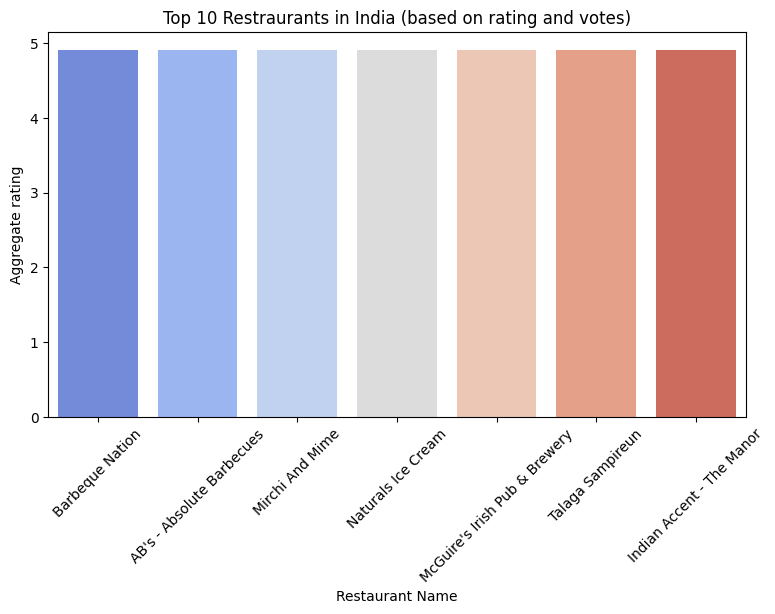

In [12]:
plt.figure(figsize=(9,5))
sns.barplot(x='Restaurant Name', y='Aggregate rating', data=top_rated_rest, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Restraurants in India (based on rating and votes)')
plt.show()

All listed restaurants—including **Barbeque Nation, AB’s - Absolute Barbecues, Mirchi And Mime**, and **Indian Accent - The Manor** — hold a **perfect rating of 5**

## Finding out relationship between the rating and votes.

<Axes: >

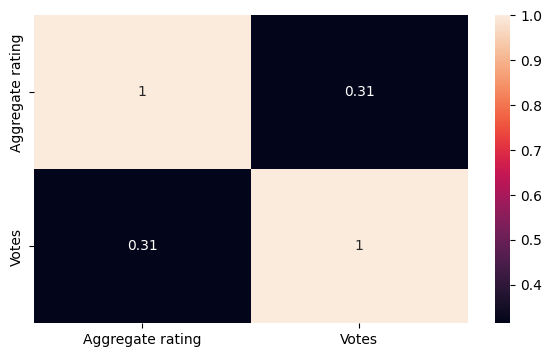

In [13]:
plt.figure(figsize=(7,4))
sns.heatmap(data[['Aggregate rating','Votes']].corr(), annot=True)

This correlation heatmap doesn't show any realtionship between Aggreagte rating and Votes.

## Number of Restaurants in each country.

In [14]:
rest_count = data.groupby(by='Country')['Restaurant Name'].count()
rest_count

Country
Australia           24
Brazil              60
Canada               4
India             8652
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 60
United Kingdom      80
United States      434
Name: Restaurant Name, dtype: int64

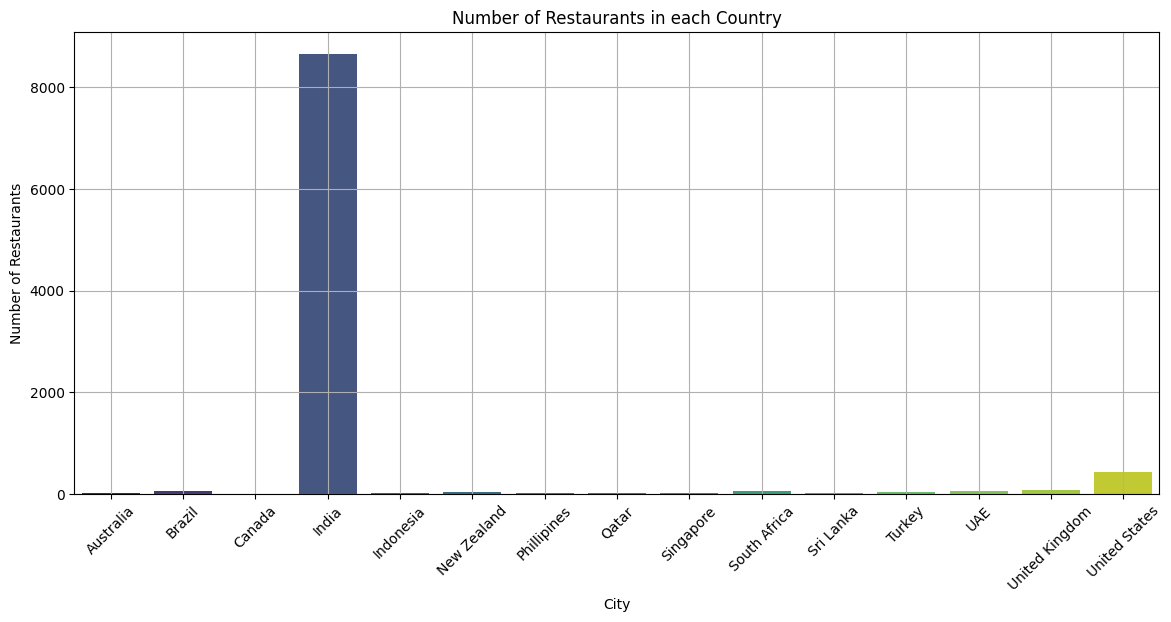

In [15]:
plt.figure(figsize=(14,6))
sns.barplot(rest_count,palette='viridis')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants in each Country')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**India** has the largest number of restaurants in the dataset by far, while other countries contribute only a small fraction comparatively.

## Top 5 restaurants with online delivery

In [16]:
rest_with_online_delivery = data[data['Has Online delivery']=='Yes'].sort_values(['Aggregate rating','Votes'],ascending=[False,False]).head(5)
rest_with_online_delivery

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3013,310143,Naturals Ice Cream,1,New Delhi,"L-8, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222148,28.634348,Ice Cream,...,No,Yes,No,No,1,4.9,Dark Green,Excellent,2620,India
2350,18209498,Zolocrust - Hotel Clarks Amer,1,Jaipur,"Hotel Clarks Amer, Jawaharlal Nehru Marg, Near...","Hotel Clarks Amer, Malviya Nagar","Hotel Clarks Amer, Malviya Nagar, Jaipur",75.802300,26.846156,"Italian, Bakery, Continental",...,No,Yes,No,No,4,4.9,Dark Green,Excellent,322,India
1381,18384115,Caterspoint,1,Gurgaon,"S-27/11, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.103974,28.487264,"Mexican, American, Healthy Food",...,No,Yes,No,No,2,4.9,Dark Green,Excellent,223,India
841,3001321,CakeBee,1,Coimbatore,"6/1, SRP Nagar, Saibaba Colony, Coimbatore",Saibaba Colony,"Saibaba Colony, Coimbatore",76.944652,11.026117,"Bakery, Desserts",...,No,Yes,No,No,2,4.9,Dark Green,Excellent,200,India
809,73088,Chili's,1,Chennai,"49 & 50 L, Express Avenue Mall, White's Road, ...","Express Avenue Mall, Royapettah","Express Avenue Mall, Royapettah, Chennai",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",...,Yes,Yes,No,No,3,4.8,Dark Green,Excellent,1262,India


Text(0.5, 1.0, 'Top 5 Restaurants with Online Delivery facility')

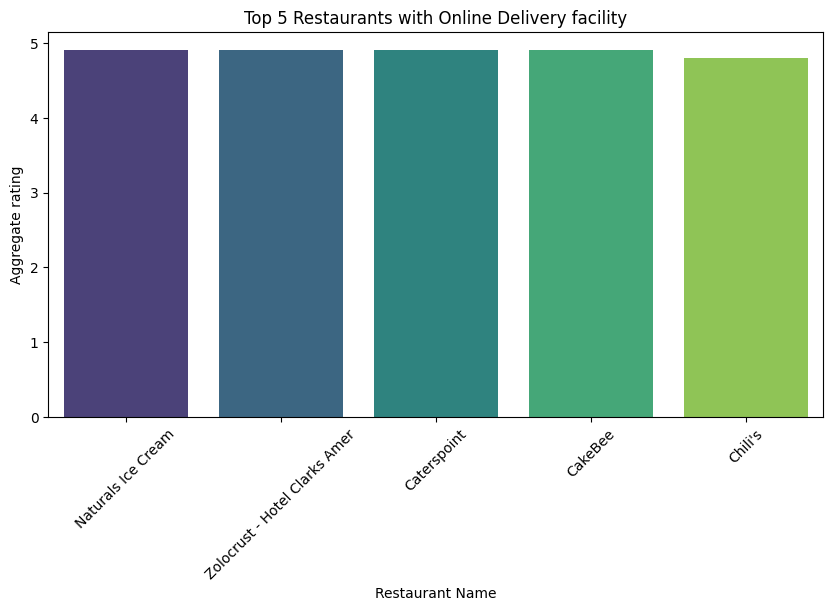

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='Restaurant Name', y='Aggregate rating',data=rest_with_online_delivery,palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 5 Restaurants with Online Delivery facility')

**Naturals Ice Cream** leads with a **perfect rating of 5**, signaling top-notch service and customer delight.

**Zolocrust - Hotel Clarks Amer and Caterspoint** follow closely behind, each delivering high satisfaction through their online offerings.

**CakeBee** also ranks well, while **Chili's**, though slightly lower, still maintains a strong rating near **4.7–4.8**.

## Cheap but best resaurants in each city in a country.

In [47]:
mean_cost = data['Average Cost for two'].mean()
indian_rest = data[data['Country']=='India']
cheap_but_best_rest = indian_rest.groupby(by='City')
cheap_but_best_rest = indian_rest[indian_rest['Aggregate rating']>=4]
cheap_but_best_rest = cheap_but_best_rest[cheap_but_best_rest['Average Cost for two']<mean_cost].head(10)
cheap_but_best_rest['Restaurant Name']

627    Chokho Jeeman Marwari Jain Bhojanalya
628                           Pinch Of Spice
635                   Dasaprakash Restaurant
637                          Sheroes Hangout
641                                Pizza Hut
642         Tea'se Me - Rooftop Tea Boutique
643                               Thaaliwala
644                 650 - The Global Kitchen
646                            Huber & Holly
647                                   @Mango
Name: Restaurant Name, dtype: object

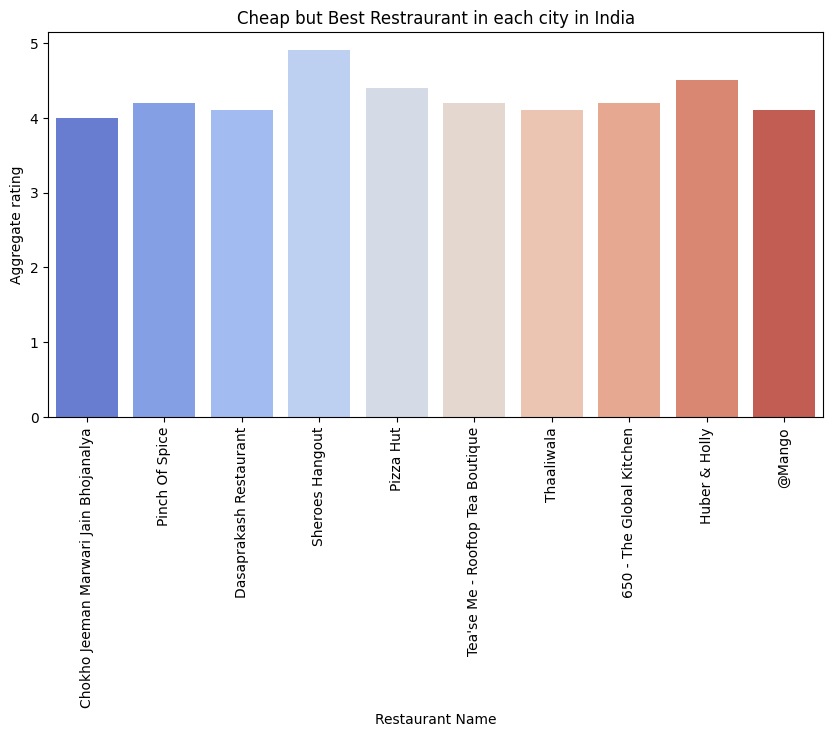

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x='Restaurant Name', y='Aggregate rating', data=cheap_but_best_rest, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Cheap but Best Restraurant in each city in India')
plt.show()

The graph highlights top-rated budget-friendly restaurants across Indian cities, with **Sheroes Hangout** achieving the highest customer satisfaction, and others consistently rated **above 4**, proving great food doesn't have to be expensive.

## Top Cuisines in each region.

In [45]:
# top_cuisines = data.copy()
# top_cuisines['City_Cuisine'] = top_cuisines['City'] + ' - ' + top_cuisines['Cuisines']
top_cuisines = data.groupby('City')['Cuisines'].apply(lambda x: x.mode()[0] if len(x.mode())>1 else x.mode())
top_cuisines.head()

City
Abu Dhabi                                             American
Agra         0    North Indian, Mughlai
Name: Agra, dtype: ...
Ahmedabad     Cafe, American, Continental, Armenian, Fast Food
Albany       0    Japanese, Steak, Sushi
Name: Albany, dtyp...
Allahabad    0    North Indian, Chinese
Name: Allahabad, dt...
Name: Cuisines, dtype: object

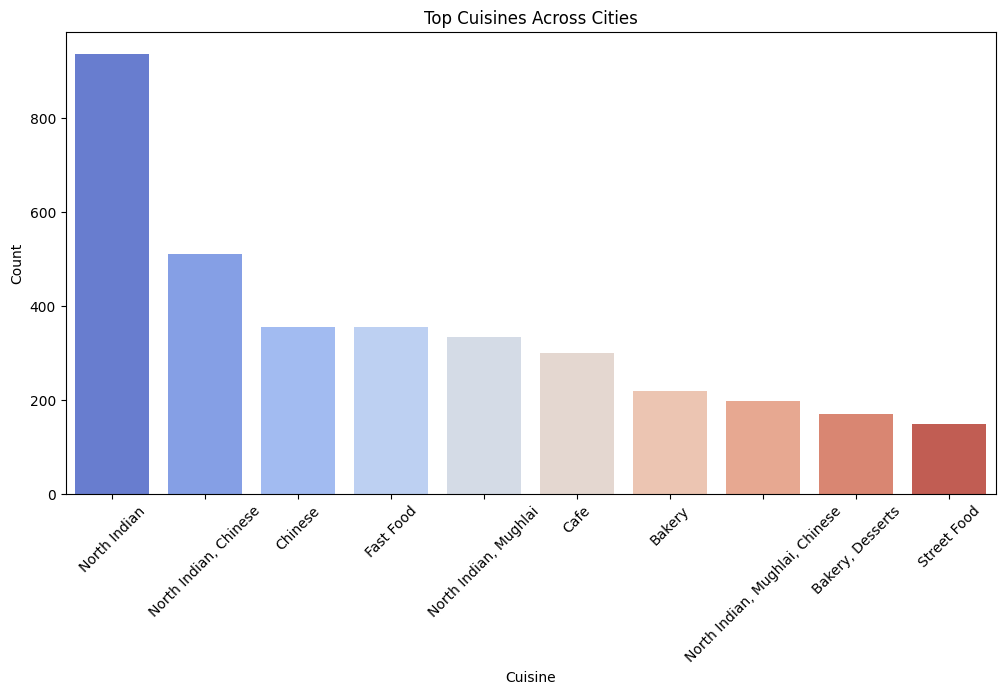

In [42]:
cuisine_counts = data['Cuisines'].value_counts().head(10)  # Top 10 cuisines

plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top Cuisines Across Cities')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

**North Indian** cuisine is the most popular, followed by a **mix of North Indian and Chinese**, then **standalone Chinese, Fast Food, and Mughlai**. The chart reflects a strong preference for hearty, familiar dishes with growing variety in modern dining trends.

## Aggregate rating of all restaurants in each in a country.

In [17]:
country_rating = data.groupby('Country')['Aggregate rating'].mean().sort_values(ascending=False)
country_rating

Country
Phillipines       4.468182
Turkey            4.300000
Indonesia         4.295238
New Zealand       4.262500
UAE               4.233333
South Africa      4.210000
United Kingdom    4.087500
Qatar             4.060000
United States     4.007294
Sri Lanka         3.870000
Brazil            3.763333
Australia         3.658333
Canada            3.575000
Singapore         3.575000
India             2.523324
Name: Aggregate rating, dtype: float64

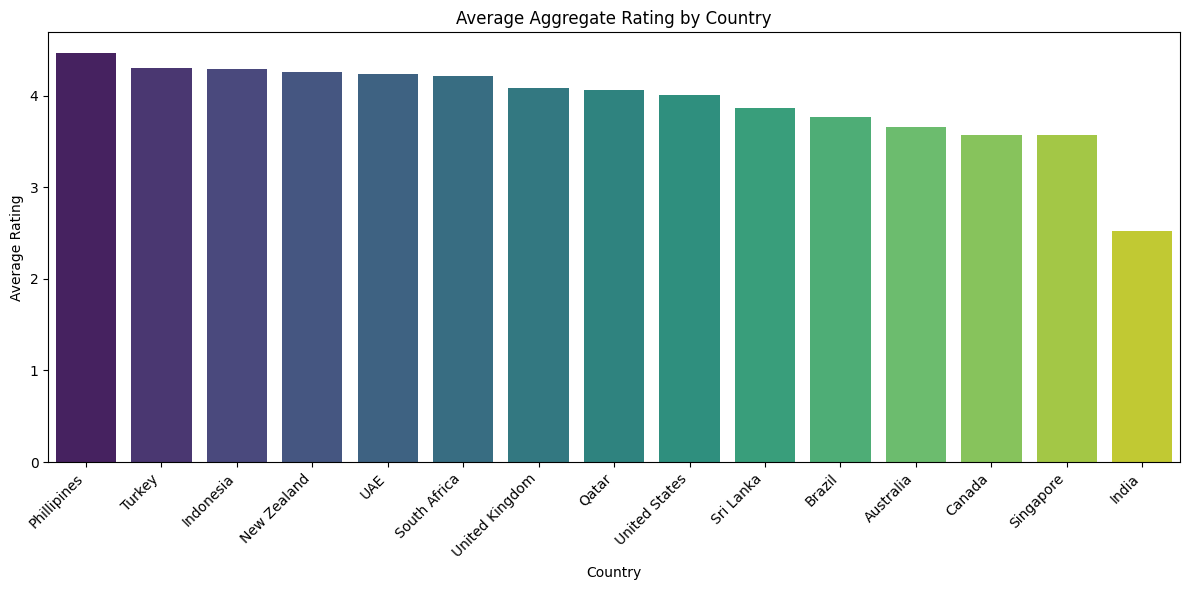

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x=country_rating.index, y=country_rating.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Aggregate Rating by Country')
plt.ylabel('Average Rating')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

The **Philippines** has the highest average restaurant rating, while **India** has the lowest. Most other countries fall between, showing moderate customer satisfaction across the board.

## Does rating influences the cost of restaurant? 

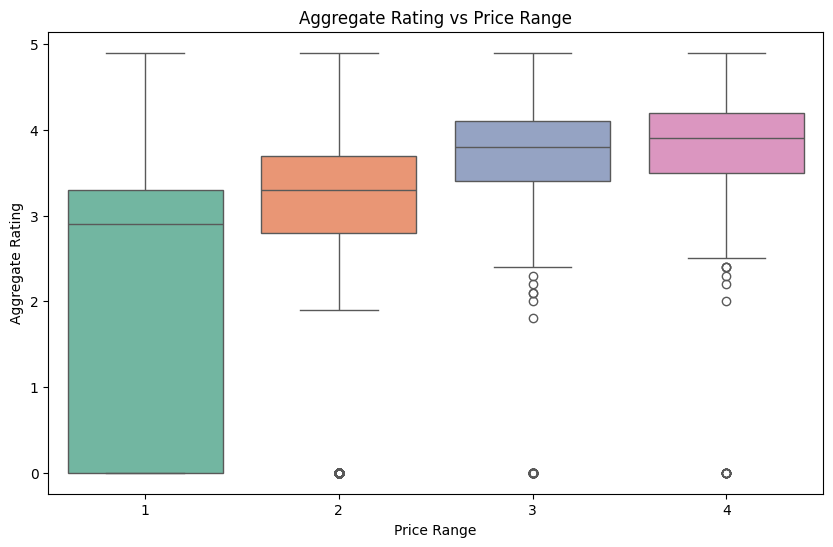

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Price range', y='Aggregate rating', data=data, palette='Set2')
plt.title('Aggregate Rating vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

Higher-priced restaurants tend to have better and more consistent ratings, while lower-priced ones show more variability. Despite some exceptions, there's an overall positive—but not strict—relationship between price and rating.

## Top percentage cover of restraurants in a city.

In [29]:
city_counts = data['City'].value_counts()

city_percent = (city_counts / city_counts.sum()) * 100

top_cities = city_percent.head(10) 

top_cities

City
New Delhi       57.356948
Gurgaon         11.716621
Noida           11.318382
Faridabad        2.630476
Ghaziabad        0.262000
Bhubaneshwar     0.220080
Ahmedabad        0.220080
Lucknow          0.220080
Guwahati         0.220080
Amritsar         0.220080
Name: count, dtype: float64

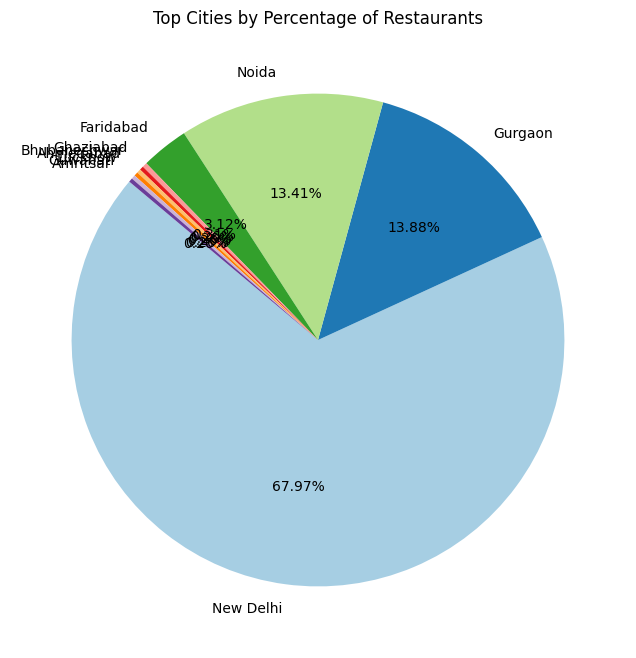

In [30]:
top_cities.plot(kind='pie', autopct='%1.2f%%', figsize=(8,8), startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top Cities by Percentage of Restaurants')
plt.ylabel('')
plt.show()

**New Delhi** dominates the dataset with nearly **68%** of all restaurants, while **Gurgaon and Noida** contribute modest shares around **13–14%** each. Other cities make up a small fraction of the total.

## Top cuisines in Indian restraurants.

In [36]:
indian_restaurants = data[data['Country'] == 'India']

all_cuisines = indian_restaurants['Cuisines'].str.split(', ')
flat_cuisine_list = [cuisine for sublist in all_cuisines for cuisine in sublist]
cuisine_counts = Counter(flat_cuisine_list)

top_cuisines = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)
top_cuisines.head(10)

,Cuisine,Count
0,North Indian,3946
3,Chinese,2690
13,Fast Food,1963
1,Mughlai,992
26,Bakery,726
6,Continental,724
10,Italian,682
7,South Indian,631
9,Cafe,627
8,Desserts,597


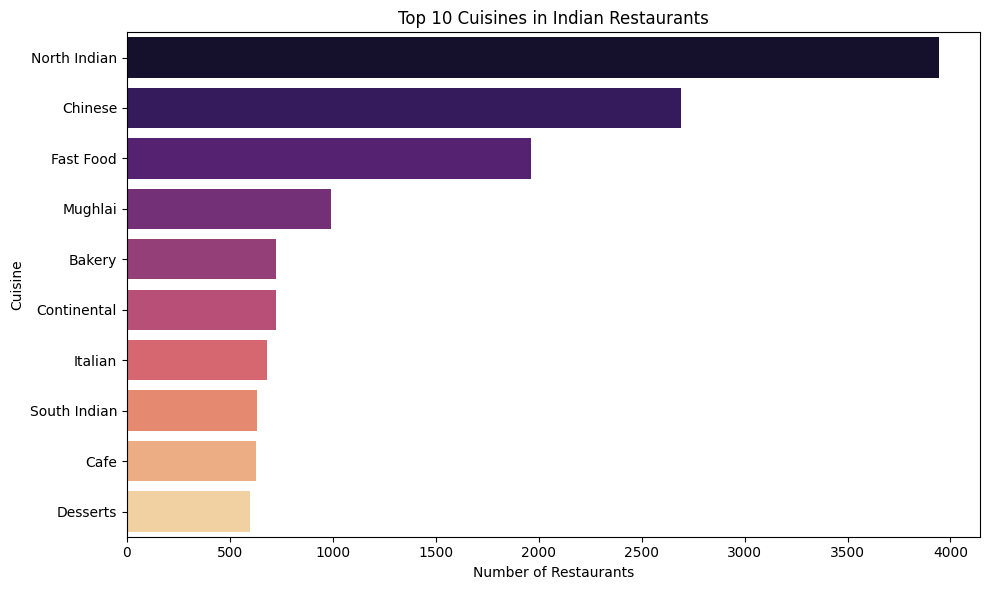

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_cuisines.head(10), x='Count', y='Cuisine', palette='magma')
plt.title('Top 10 Cuisines in Indian Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

**North Indian** cuisine dominates the scene, offered by nearly 4,000 restaurants—highlighting its widespread appeal and cultural centrality.

**Chinese and Fast Food** follow as the second and third most popular, suggesting strong preferences for familiar and quick-service options.

**Mughlai, Bakery, Continental, and Italian** cuisines also hold solid ground, indicating diversity in dining choices beyond traditional fare.

**South Indian, Café offerings, and Desserts** complete the list, showing niche yet notable representation.

# Conclusion
* **India dominates** the Zomato dataset with the highest number of restaurant entries, followed distantly by countries like the USA, UK, and UAE.

* Within India, **New Delhi alone accounts for nearly 68%** of all listed restaurants, followed by Gurgaon and Noida, highlighting a regional concentration of listings.

* **North Indian cuisine** is the most offered and preferred, followed by combinations like **North Indian + Chinese**, and other popular choices like **Fast Food and Mughlai**, indicating customer preference for familiar and spicy dishes.

* **Online delivery is common**, but not all top-rated restaurants offer it. Still, outlets like **Zolocrust** and **Caterspoint** perform well with online services, suggesting delivery-friendly businesses can maintain high satisfaction.

* The **Philippines, Turkey, and Indonesia** have the **highest average restaurant ratings**, whereas **India ranks lower**, indicating potential quality or rating biases in the Indian dataset.

* **Naturals Ice Cream** stands out with a **perfect rating of 5**, representing the pinnacle of customer satisfaction among Indian restaurants.

* There is **no strong correlation** between the number of votes and aggregate ratings, showing popularity doesn’t always equate to quality.

* A group of restaurants offer both **low cost and high ratings**, representing ideal "value-for-money" dining choices in multiple Indian cities.


# Suggestion
* Zomato can **focus on promoting underrated high-rated restaurants** with fewer votes to improve visibility.
* Encourage **online delivery options** for top-rated offline-only restaurants.
* Explore expanding in **underrepresented high-rating countries** like Turkey and the Philippines.
* Support restaurants offering **value-for-money options**—high ratings at low cost—through marketing badges or highlights.
* Address quality concerns in **overrepresented regions** like Delhi to maintain standards.